<a href="https://colab.research.google.com/github/seheeki/-/blob/master/ict1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time

import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [ ]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 86 (delta 38), reused 46 (delta 16), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './dataset2/train/',
    './dataset2/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir('./dataset2/' + query + '/'): # for file_name in os.listdir(query):
        #print('file_name: ', file_name)
        if cnt < train_cnt:              
            print("check train")
            print(f'[Train Dataset] {file_name}')
            #changeDir(file_source, file_destination):
            shutil.move('./dataset2/' + query + '/' + file_name, directory_list[0] + query)
        else:
            #print("check test")
            print(f'[Test Dataset] {file_name}')
            shutil.move('./dataset2/' + query + '/' + file_name, directory_list[1] + query + '/' + file_name)
        cnt += 1
        print('cnt = ', cnt, '\n')
    shutil.rmtree('./dataset2/' + query)

'''directory_list = [
    '/content/gdrive/My Drive/dataset2/train/',
    '/content/gdrive/My Drive/dataset2/test/',
]
'''

'''# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)

    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir('/content/gdrive/My Drive/dataset2/' + query + '/'): # for file_name in os.listdir(query):
        print('file_name: ', file_name)
        if cnt < train_cnt:              
            print("check train")
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, directory_list[0] + query + '/' + file_name)
        else:
            print("check test")
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, directory_list[1] + query + '/' + file_name)
        cnt += 1
        print('cnt = ', cnt, '\n')
    #shutil.rmtree('/content/gdrive/My Drive/dataset2/' + query)
'''

'# 초기 디렉토리 만들기\nfor directory in directory_list:\n    if not os.path.isdir(directory):\n        os.makedirs(directory)\n\n# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수\ndef dataset_split(query, train_cnt):\n    # 학습 및 평가 데이터셋 디렉토리 만들기\n    for directory in directory_list:\n        if not os.path.isdir(directory + \'/\' + query):\n            os.makedirs(directory + \'/\' + query)\n\n    # 학습 및 평가 데이터셋 준비하기\n    cnt = 0\n    for file_name in os.listdir(\'/content/gdrive/My Drive/dataset2/\' + query + \'/\'): # for file_name in os.listdir(query):\n        print(\'file_name: \', file_name)\n        if cnt < train_cnt:              \n            print("check train")\n            print(f\'[Train Dataset] {file_name}\')\n            shutil.move(query + \'/\' + file_name, directory_list[0] + query + \'/\' + file_name)\n        else:\n            print("check test")\n            print(f\'[Test Dataset] {file_name}\')\n            shutil.move(query + \'/\' + file_name, directory_list[1] + query + \'/\' + 

In [ ]:
def changeDir(file_source, file_destination):
  get_files = os.listdir(file_source)
  for files in get_files:
    shutil.move(file_source + files, file_destination)

In [ ]:
query = 'industrial style'
query2 = 'industrial interior style'
if not os.path.isdir('./dataset2/'+ query + '/'):
        os.makedirs('./dataset2/'+ query + '/')

downloader.download(query2, limit=40,  output_dir='./dataset2/', adult_filter_off=True, force_replace=False, timeout=60)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://nextluxury.com/wp-content/uploads/interior-design-industrial-style.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://blog.modsy.com/wp-content/uploads/2020/03/651448_D5_LivingRoom_PureIndustrial2_Full1-1.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.pinimg.com/originals/43/7e/b2/437eb2198aae65f51f058b076e5f1fde.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://vintageindustrialstyle.com/wp-content/uploads/2017/10/The-Industrial-Interior-Design-to-Get-Your-Inspirations-Going-4.jpg)
[Error] Invalid image, not saving http://vintageindustrialstyle.com/wp-content/uploads/2017/10/The-Industrial-Interior-Design-to-Get-Your-Inspirations-Going-4.jpg
[Info] Issue getting: http://vintageindustrialstyle.com/wp-content/uploads/2017/10/The-Industrial-Interior-Design-to-Get-Your-Inspirations-Going-4.jpg
[Error] No active exception to reraise
#4 이미지 다운로드 (http://www.architectureartdesigns.com/wp-content/uploads/2018/11/5-1.jpg

In [ ]:
changeDir('./dataset2/' + query2 + '/', './dataset2/' + query)
shutil.rmtree('./dataset2/' + query2)

In [ ]:
dataset_split(query, 0)

[Test Dataset] image_8.jpg
cnt =  1 

[Test Dataset] image_40.jpg
cnt =  2 

[Test Dataset] image_37.jpg
cnt =  3 

[Test Dataset] image_24.jpg
cnt =  4 

[Test Dataset] image_12.jpg
cnt =  5 

[Test Dataset] image_1.jpg
cnt =  6 

[Test Dataset] image_17.jpg
cnt =  7 

[Test Dataset] image_7.jpg
cnt =  8 

[Test Dataset] image_3.jpg
cnt =  9 

[Test Dataset] image_4.jpg
cnt =  10 

[Test Dataset] image_14.jpg
cnt =  11 

[Test Dataset] image_2.jpg
cnt =  12 

[Test Dataset] image_34.jpg
cnt =  13 

[Test Dataset] image_19.jpg
cnt =  14 

[Test Dataset] image_6.jpg
cnt =  15 

[Test Dataset] image_21.jpg
cnt =  16 

[Test Dataset] image_22.jpg
cnt =  17 

[Test Dataset] image_27.jpg
cnt =  18 

[Test Dataset] image_33.jpg
cnt =  19 

[Test Dataset] image_20.jpg
cnt =  20 

[Test Dataset] image_13.jpg
cnt =  21 

[Test Dataset] image_36.jpg
cnt =  22 

[Test Dataset] image_18.jpg
cnt =  23 

[Test Dataset] image_9.jpg
cnt =  24 

[Test Dataset] image_29.jpg
cnt =  25 

[Test Dataset] im

In [ ]:
query = 'romantic style'
query2 = 'romantic interior style'
if not os.path.isdir('./dataset2/'+ query + '/'):
        os.makedirs('./dataset2/'+ query + '/')

downloader.download(query2, limit=40,  output_dir='./dataset2/', adult_filter_off=True, force_replace=False, timeout=60)

changeDir('./dataset2/' + query2 + '/', './dataset2/' + query)
shutil.rmtree('./dataset2/' + query2)
dataset_split(query, 0)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://livinator.com/wp-content/uploads/2015/11/houseanddecoration.jpg)
[Error] Invalid image, not saving https://livinator.com/wp-content/uploads/2015/11/houseanddecoration.jpg
[Info] Issue getting: https://livinator.com/wp-content/uploads/2015/11/houseanddecoration.jpg
[Error] No active exception to reraise
#1 이미지 다운로드 (https://i.pinimg.com/originals/1e/3f/88/1e3f882409b3797b6c88e6cd937cf45b.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://d1evnkpob02sxb.cloudfront.net/CACHE/images/magazine/images/2016-04-provance-interior-design-1024x683/0dd33538294e2e699b41f2f4a6d73b5d.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://www.stevewilliamskitchens.co.uk/wp-content/uploads/2016/03/romantic-living-room-ideas-3.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://unidcr.com/wp-content/uploads/2020/06/American-Farmhouse-Interior-with-Modern-Look.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://deavita.net/wp-content/uploads/2015/0

In [ ]:
query = 'natural style'
query2 = 'natural interior style'
if not os.path.isdir('./dataset2/'+ query + '/'):
        os.makedirs('./dataset2/'+ query + '/')

downloader.download(query2, limit=40,  output_dir='./dataset2/', adult_filter_off=True, force_replace=False, timeout=60)

changeDir('./dataset2/' + query2 + '/', './dataset2/' + query)
shutil.rmtree('./dataset2/' + query2)
dataset_split(query, 0)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://dolly.com/blog/wp-content/uploads/2017/12/naturaldesign2.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://decor24online.com/wp-content/uploads/2020/01/imgonline-com-ua-Mirror-KxFGs0zbDxQEKX3.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.pinimg.com/originals/dd/eb/90/ddeb900f0e35fe4c98b0ab5cf6361909.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://cdn2.uvnimg.com/5b/7a/fcd339fc4a6fa9d855a888293dbf/istock-000008309905-medium.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://blog.coldwellbankerluxury.com/wp-content/uploads/2018/01/Amara_Enjoy-space-1.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://www.amara.com/luxpad/wp-content/uploads/2017/08/Origin-Living-Main34-1.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/0d093731480639.5654b57429099.jpg)
[Error] Invalid image, not saving https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/0d093731480639.5654b57429099

In [ ]:
query = 'modern style'
query2 = 'modern interior style'
if not os.path.isdir('./dataset2/'+ query + '/'):
        os.makedirs('./dataset2/'+ query + '/')

downloader.download(query2, limit=40,  output_dir='./dataset2/', adult_filter_off=True, force_replace=False, timeout=60)

changeDir('./dataset2/' + query2 + '/', './dataset2/' + query)
shutil.rmtree('./dataset2/' + query2)
dataset_split(query, 0)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://www.smalldesignideas.com/wp-content/uploads/2016/02/unusually_designed_bedroom_contemporary_style.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://www.smalldesignideas.com/wp-content/uploads/2016/02/4e01d8aebb1eb1c3e8a227b7d7506cc4.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://www.thespruce.com/thmb/k4Czd-UDSA0xSwGDQhO2vY4AOJE=/5411x3219/filters:fill(auto,1)/GettyImages-494358447-59a2b77ad963ac00116b7e36.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://thewowstyle.com/wp-content/uploads/2015/06/Modern-Interior-Designers-5-Modern-Interior-Design.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://inspirationdesignbooks.com/blog/wp-content/uploads/2018/07/Modern-Classic-Style-In-This-Interior-Design-Project-5.jpg)
[Error] Invalid image, not saving http://inspirationdesignbooks.com/blog/wp-content/uploads/2018/07/Modern-Classic-Style-In-This-Interior-Design-Project-5.jpg
[Info] Issue getting: http://inspirationdesignbo

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_datasets = datasets.ImageFolder(os.path.join('/content/gdrive/My Drive/dataset/', 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join('./dataset2/', 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)


학습 데이터셋 크기: 105
테스트 데이터셋 크기: 160
클래스: ['industrial style', 'modern style', 'natural style', 'romantic style']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


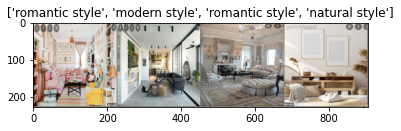

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#0 Loss: 1.2895 Acc: 43.8095% Time: 11.4608s
#1 Loss: 0.7157 Acc: 73.3333% Time: 14.8416s
#2 Loss: 0.6086 Acc: 75.2381% Time: 18.2602s
#3 Loss: 0.5750 Acc: 80.0000% Time: 21.6686s
#4 Loss: 0.3271 Acc: 85.7143% Time: 25.2339s
#5 Loss: 0.3766 Acc: 84.7619% Time: 29.6837s
#6 Loss: 0.2889 Acc: 88.5714% Time: 33.0888s
#7 Loss: 0.3118 Acc: 90.4762% Time: 36.5338s
#8 Loss: 0.5002 Acc: 83.8095% Time: 40.0016s
#9 Loss: 0.2640 Acc: 91.4286% Time: 43.4086s
#10 Loss: 0.3225 Acc: 90.4762% Time: 46.8049s
#11 Loss: 0.2648 Acc: 87.6190% Time: 50.2596s
#12 Loss: 0.3346 Acc: 89.5238% Time: 53.8152s
#13 Loss: 0.2739 Acc: 87.6190% Time: 57.2197s
#14 Loss: 0.4235 Acc: 89.5238% Time: 61.3212s
#15 Loss: 0.2693 Acc: 92.3810% Time: 64.7783s
#16 Loss: 0.1152 Acc: 95.2381% Time: 68.3117s
#17 Loss: 0.2587 Acc: 92.3810% Time: 72.2462s
#18 Loss: 0.1294 Acc: 95.2381% Time: 75.6545s
#19 Loss: 0.1876 Acc: 91.4286% Time: 79.0783s
#20 Loss: 0.2242 Acc: 90.4762% Time: 82.6107s
#21 Loss: 0.2174 Acc: 93.3333% Time: 85.9811

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[예측 결과: modern style] (실제 정답: modern style)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

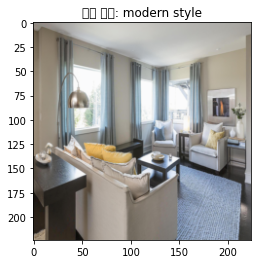

[예측 결과: modern style] (실제 정답: modern style)


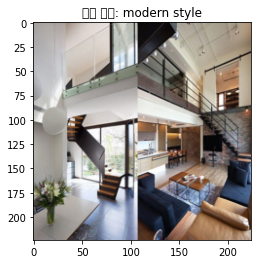

[예측 결과: romantic style] (실제 정답: romantic style)


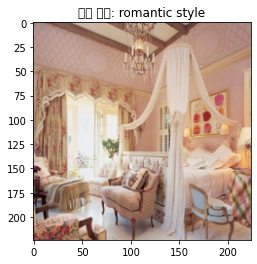

[예측 결과: natural style] (실제 정답: modern style)


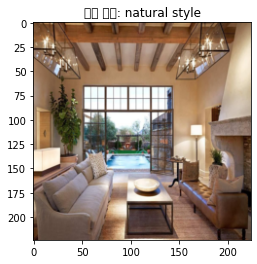

[예측 결과: modern style] (실제 정답: industrial style)


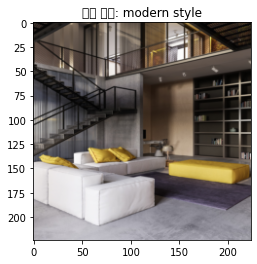

[예측 결과: industrial style] (실제 정답: industrial style)


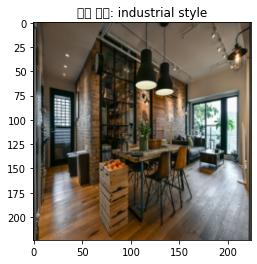

[예측 결과: modern style] (실제 정답: modern style)


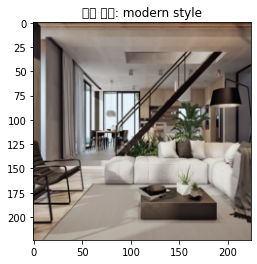

[예측 결과: natural style] (실제 정답: natural style)


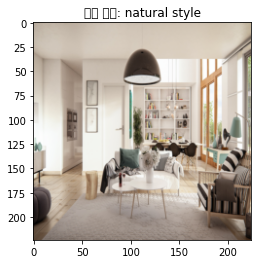

[예측 결과: industrial style] (실제 정답: industrial style)


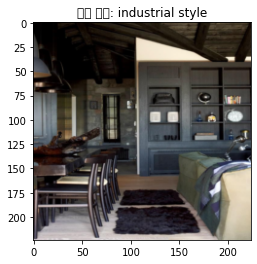

[예측 결과: natural style] (실제 정답: modern style)


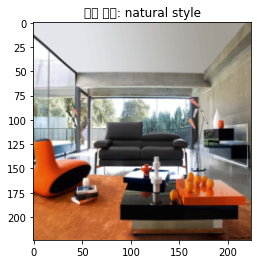

[예측 결과: natural style] (실제 정답: natural style)


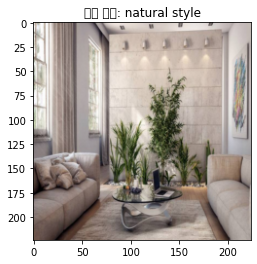

[예측 결과: romantic style] (실제 정답: natural style)


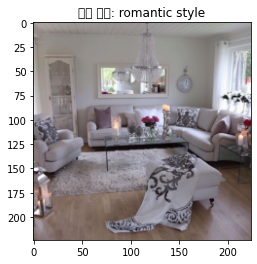

[예측 결과: industrial style] (실제 정답: industrial style)


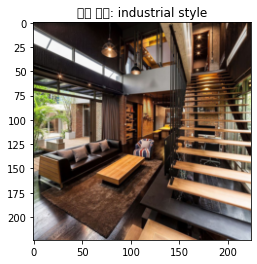

[예측 결과: modern style] (실제 정답: modern style)


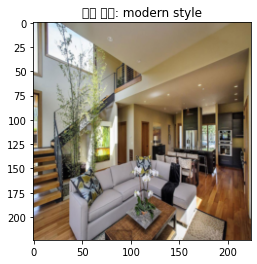

[예측 결과: romantic style] (실제 정답: romantic style)


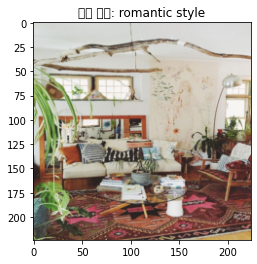

[예측 결과: romantic style] (실제 정답: romantic style)


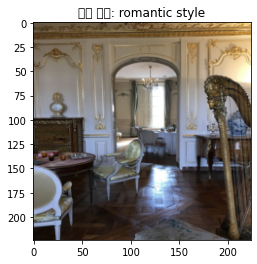

[예측 결과: modern style] (실제 정답: natural style)


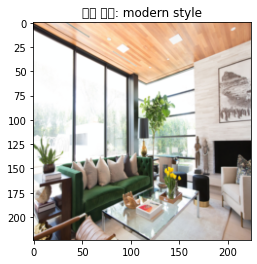

[예측 결과: modern style] (실제 정답: natural style)


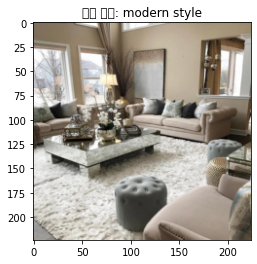

[예측 결과: romantic style] (실제 정답: romantic style)


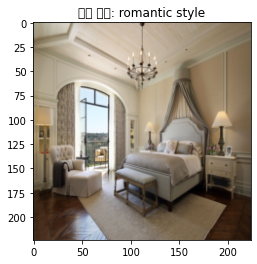

[예측 결과: industrial style] (실제 정답: natural style)


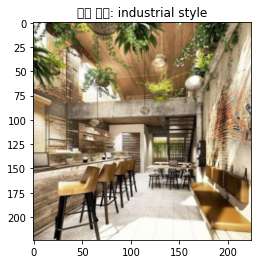

[예측 결과: natural style] (실제 정답: modern style)


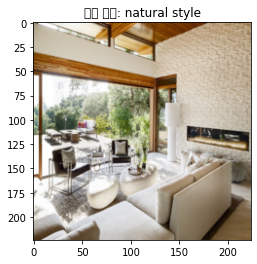

[예측 결과: industrial style] (실제 정답: industrial style)


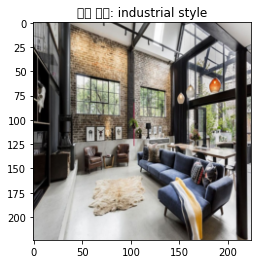

[예측 결과: industrial style] (실제 정답: modern style)


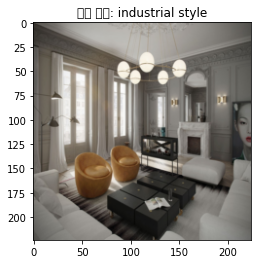

[예측 결과: modern style] (실제 정답: modern style)


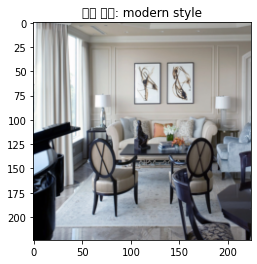

[예측 결과: industrial style] (실제 정답: industrial style)


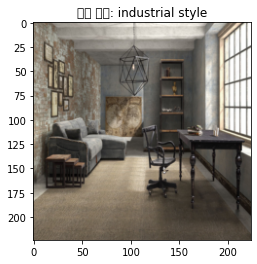

[예측 결과: natural style] (실제 정답: romantic style)


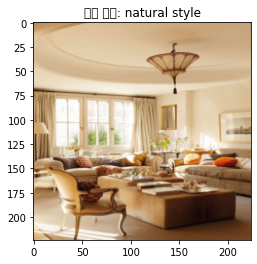

[예측 결과: industrial style] (실제 정답: natural style)


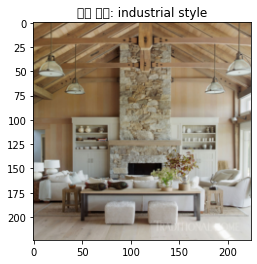

[예측 결과: natural style] (실제 정답: natural style)


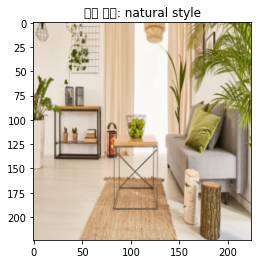

[예측 결과: natural style] (실제 정답: romantic style)


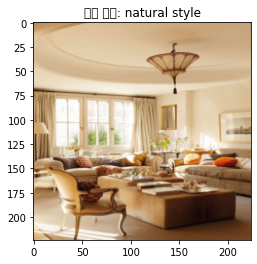

[예측 결과: romantic style] (실제 정답: romantic style)


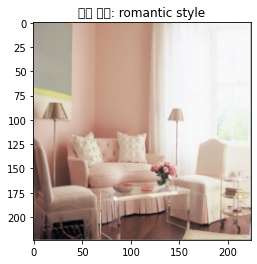

[예측 결과: modern style] (실제 정답: modern style)


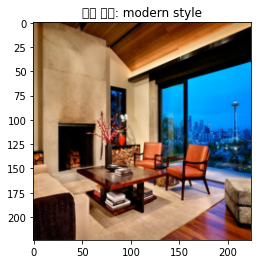

[예측 결과: modern style] (실제 정답: modern style)


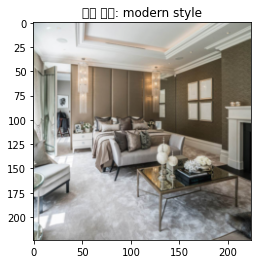

[예측 결과: natural style] (실제 정답: industrial style)


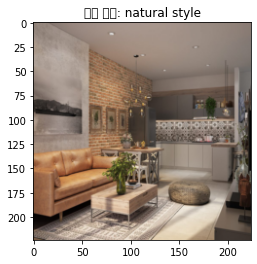

[예측 결과: natural style] (실제 정답: industrial style)


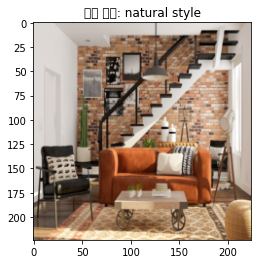

[예측 결과: natural style] (실제 정답: natural style)


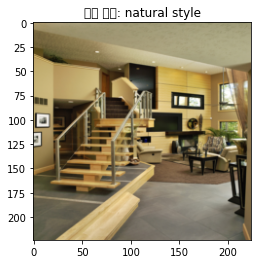

[예측 결과: modern style] (실제 정답: romantic style)


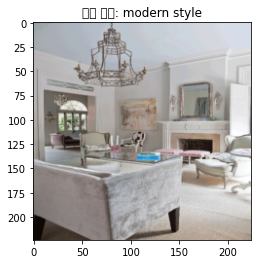

[예측 결과: modern style] (실제 정답: modern style)


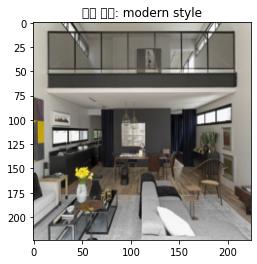

[예측 결과: romantic style] (실제 정답: romantic style)


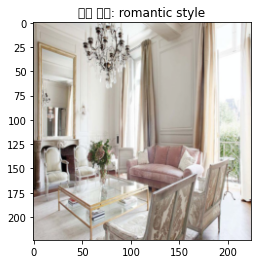

[예측 결과: industrial style] (실제 정답: industrial style)


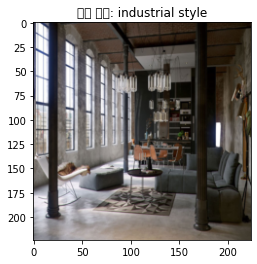

[예측 결과: romantic style] (실제 정답: romantic style)


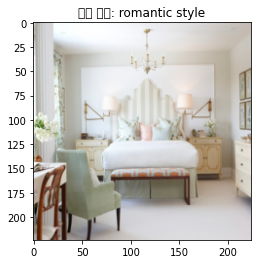

[Test Phase] Loss: 1.4337 Acc: 61.8750% Time: 19.2160s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))